In [1]:
from sklearn.datasets import load_iris
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics, linear_model
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier
from time import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from GPyOpt.methods import BayesianOptimization
from scipy.stats import uniform
from xgboost import XGBRegressor

In [2]:

#sklearn has it's own 'Real World' datasets both of which are classification problems
from sklearn.datasets import fetch_california_housing
cal = fetch_california_housing()

from sklearn.datasets import load_boston
bos = load_boston()

from sklearn.datasets import load_diabetes
dia = load_diabetes()





In [3]:
def testGrid(dataset):
    #this function calculates the hyperparameters using Grid search and returns the accuracy for each iteration of k-Fold
    #the standard deviation and the time taken
    result = []
    n_samples = len(dataset.data)
    X = dataset.data.reshape((n_samples, -1))
    y = dataset.target
    # Split the dataset in two equal parts
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.5, random_state=0)

    # Set the parameters by cross-validation
    parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
    print()
        
    clf = GridSearchCV(LinearRegression(), parameters, cv=5)
    start = time()
    clf.fit(X_train, y_train)
    
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.05f) for %r"
                % (mean, std * 2, params))
    print()
    print("In time = %0.3f" % (time() - start) )
    result = [means, stds, (time()-start)]
    return result

In [4]:
def testRandom(dataset):
    #this function calculates the hyperparameters using Random search and returns the accuracy for each iteration 
    #of k-Fold, the standard deviation and the time taken
    result = []
    n_samples = len(dataset.data)
    X = dataset.data
    y = dataset.target

    # Split the dataset in two equal parts
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.5, random_state=0)
    
    param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
    parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
    

    n_iter_search = 100
    clf = RandomizedSearchCV(LinearRegression(), param_distributions=parameters,
                                       n_iter=n_iter_search, cv=5)
    start = time()
    clf.fit(X_train, y_train)
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
        
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.05f) for %r"
                % (mean, std * 2, params))
        
    print("In time = %0.3f" % (time() - start) )
    result = [means, stds, (time()-start)]
    return result


In [14]:
from hyperopt import hp, rand, tpe, Trials, fmin

def testBayes(dataset):
    X = dataset.data
    y = dataset.target
    
    miny = min(y)
    minX = X[np.argmin(y)]
    tpeAlgo = tpe.suggest
    randAlgo = rand.suggest
    tpeTrials = Trials()
    randTrials = Trials()
    

In [10]:
#GridScores = testGrid(cov)
#GridScores = testGrid(faces)
GridScores = testGrid(dia)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]
()
Best parameters set found on development set:
()
{'copy_X': True, 'normalize': True, 'fit_intercept': True}
Grid scores on development set:
()
0.520 (+/-0.17587) for {'copy_X': True, 'normalize': True, 'fit_intercept': True}
0.520 (+/-0.17587) for {'copy_X': True, 'normalize': False, 'fit_intercept': True}
-3.597 (+/-1.04648) for {'copy_X': True, 'normalize': True, 'fit_intercept': False}
-3.597 (+/-1.04648) for {'copy_X': True, 'normalize': False, 'fit_intercept': False}
0.520 (+/-0.17587) for {'cop

In [65]:
#RandScores = testRandom(cov)
#RandScores = testRandom(faces)
RandScores = testRandom(bos)

Grid scores on development set:
()
0.743 (+/-0.19388) for {'normalize': True, 'copy_X': True, 'fit_intercept': True}
0.743 (+/-0.19388) for {'normalize': False, 'copy_X': True, 'fit_intercept': True}
0.723 (+/-0.25284) for {'normalize': True, 'copy_X': True, 'fit_intercept': False}
0.723 (+/-0.25284) for {'normalize': False, 'copy_X': True, 'fit_intercept': False}
0.743 (+/-0.19388) for {'normalize': True, 'copy_X': False, 'fit_intercept': True}
0.743 (+/-0.19388) for {'normalize': False, 'copy_X': False, 'fit_intercept': True}
0.723 (+/-0.25284) for {'normalize': True, 'copy_X': False, 'fit_intercept': False}
0.723 (+/-0.25284) for {'normalize': False, 'copy_X': False, 'fit_intercept': False}
In time = 0.098


/home/eoin/.local/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [15]:
BayesScores = testBayes(dia)

TypeError: __init__() got an unexpected keyword argument 'n_estimators'

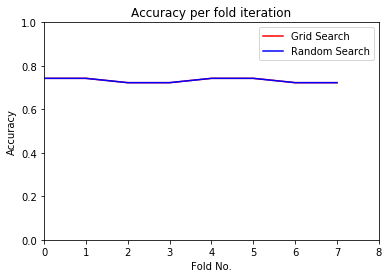

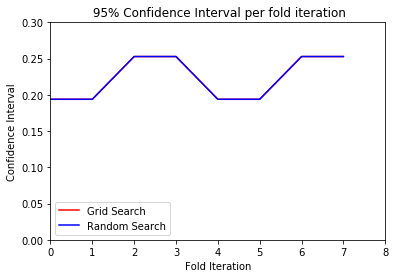

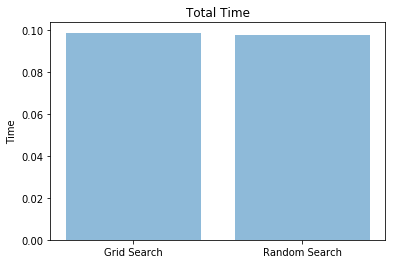

In [68]:
#This block makes three graphs, the accuracy per iteration, the confidence iterval (2*standard deviation) per iteration 
#and total time taken
plt.plot(GridScores[0], 'r', label='Grid Search')
plt.plot(RandScores[0], 'b', label = 'Random Search')
plt.ylabel('Accuracy')
plt.xlabel('Fold No.')
plt.axis([0, 8, 0, 1])
plt.title("Accuracy per fold iteration")
plt.legend();
plt.show()

gridConfidence = (GridScores[1]*2)
randConfidence = (RandScores[1]*2)
plt.plot(gridConfidence, 'r', label='Grid Search')
plt.plot(randConfidence, 'b', label = 'Random Search')
plt.ylabel('Confidence Interval')
plt.xlabel('Fold Iteration')
plt.title(" 95% Confidence Interval per fold iteration")
plt.axis([0, 8, 0, 0.3])
plt.legend()
plt.show()

performance = [GridScores[2], RandScores[2]]
objects = ('Grid Search', 'Random Search')
y_pos = np.arange(len(objects))
plt.bar(y_pos, performance, align = 'center', alpha=0.5)
plt.title("Total Time")
plt.xticks(y_pos, objects)
plt.ylabel('Time')
plt.show()